In [ ]:
import numpy as np #used to generate random numbers
import pandas as pd #used to store data in a dataframeimport matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#load the CSV file into a pandas dataframe
df = pd.read_csv('fetal_health.csv')
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,68.0,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


Normalize all variables except for the target 'fetal_health'.
Conduct IQR replacement and log transformations for all except 'baseline value,' 'histogram_mode,' 'histogram_mean,' 'histogram_median,' and target variable 'fetal_health.'

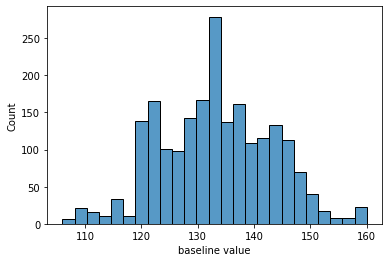

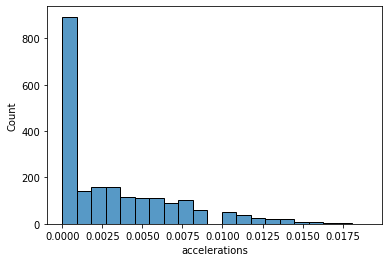

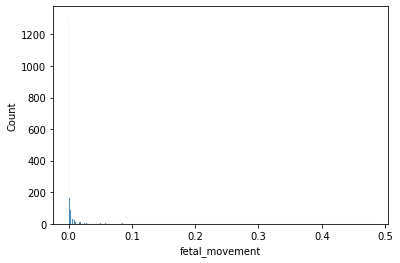

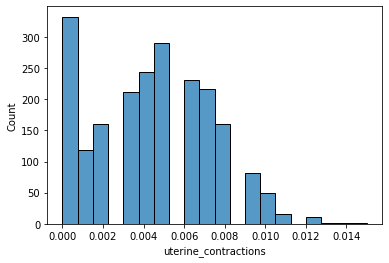

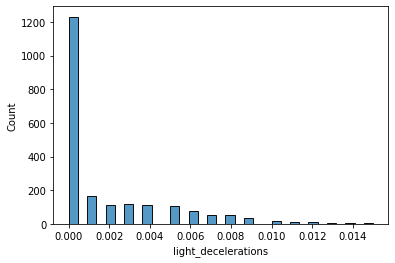

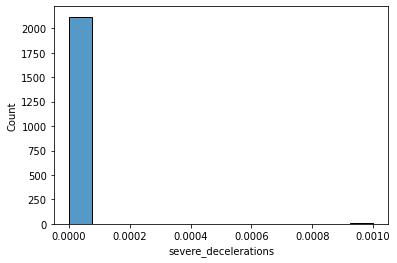

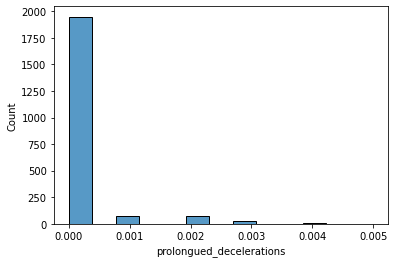

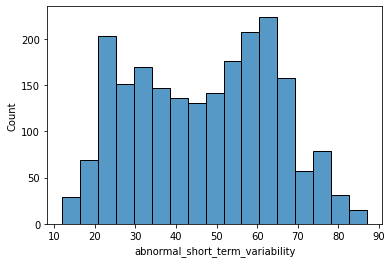

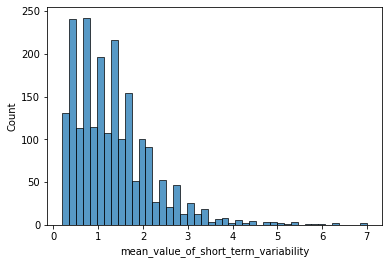

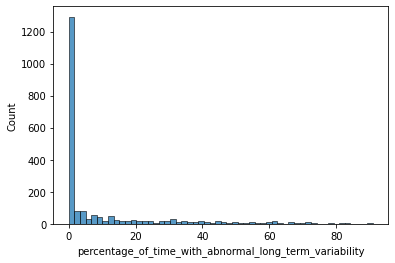

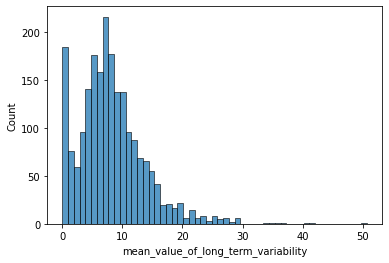

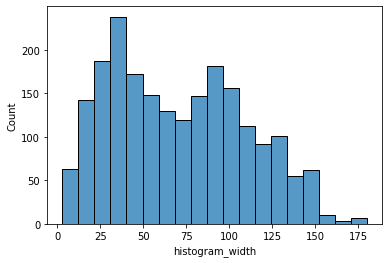

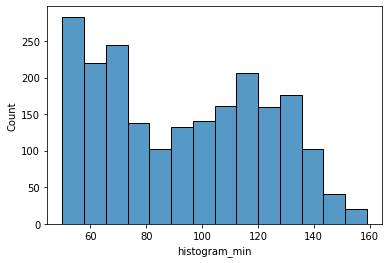

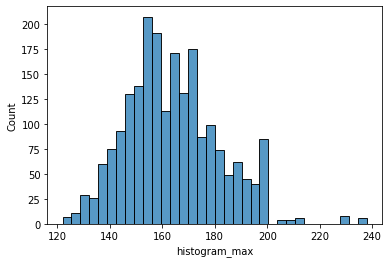

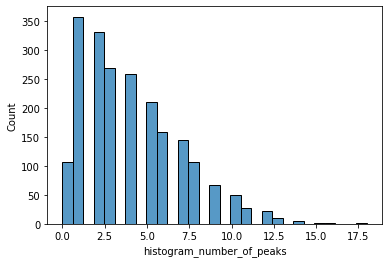

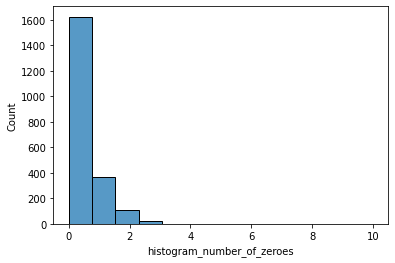

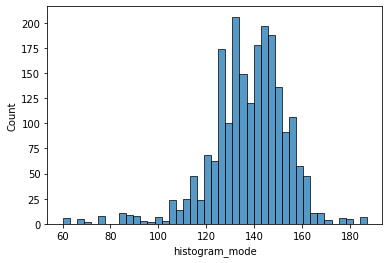

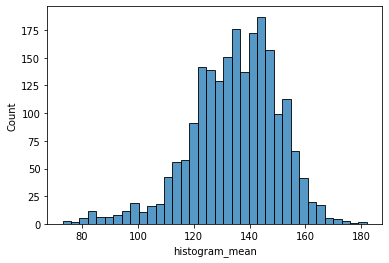

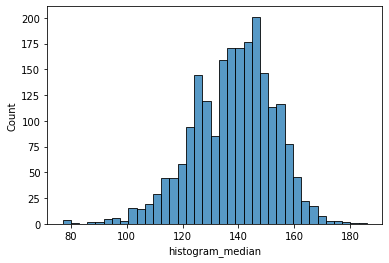

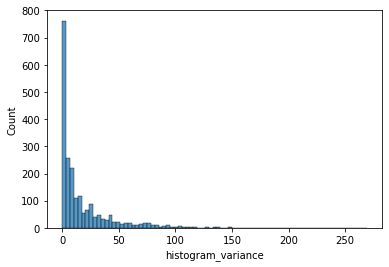

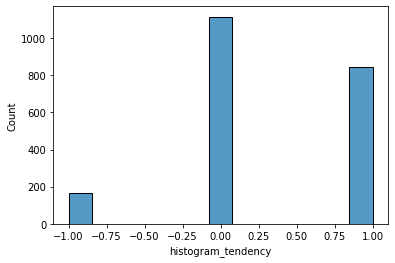

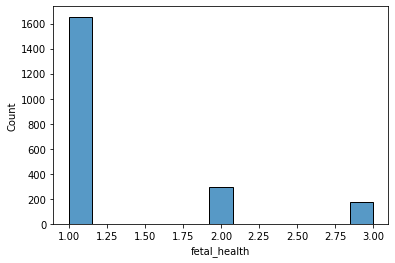

In [ ]:
for i in df.columns:
  plt.figure()
  sns.histplot(data=df,x=i)

In [ ]:
df = df.drop('histogram_tendency',axis=1)

In [ ]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [ ]:
df.loc[:,'baseline value':'histogram_variance'] = normalize(df.loc[:,'baseline value':'histogram_variance'])

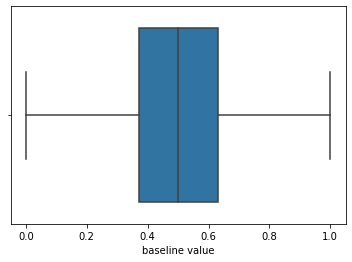

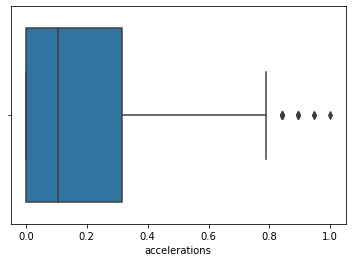

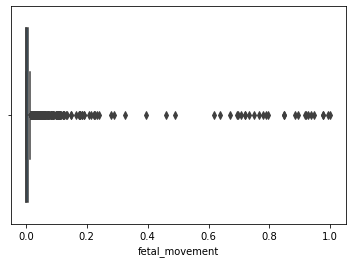

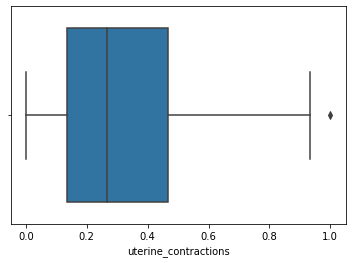

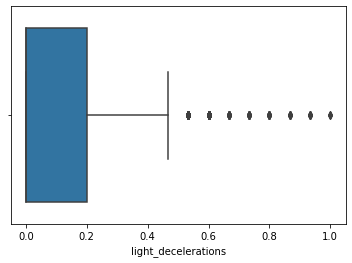

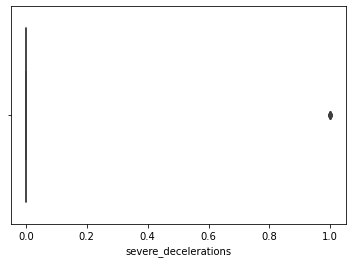

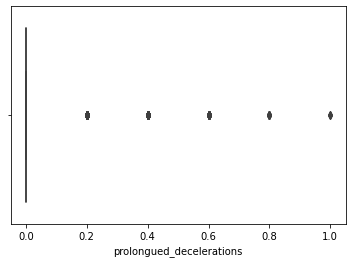

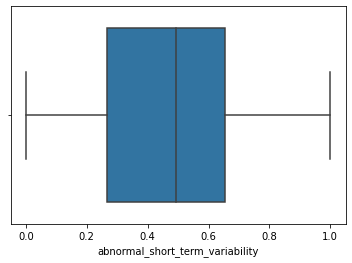

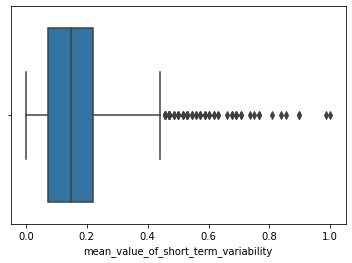

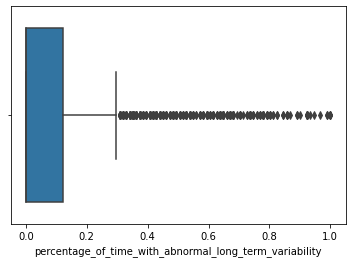

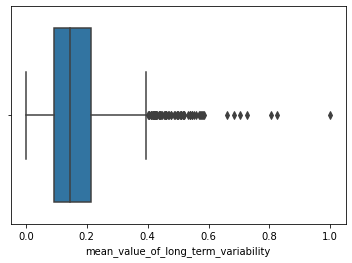

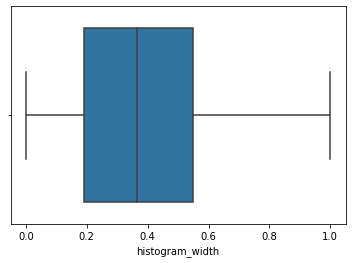

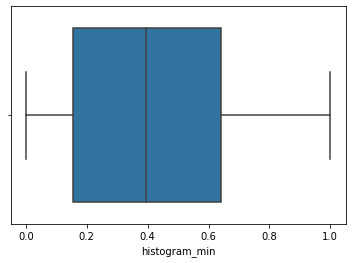

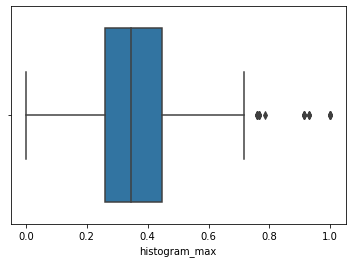

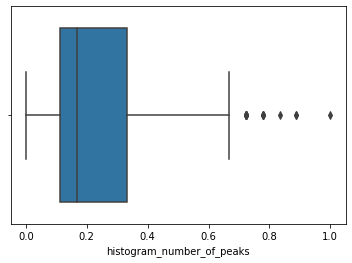

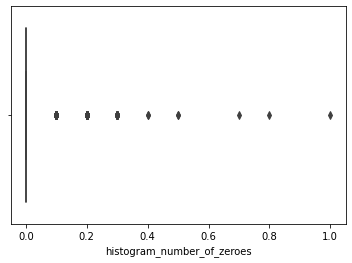

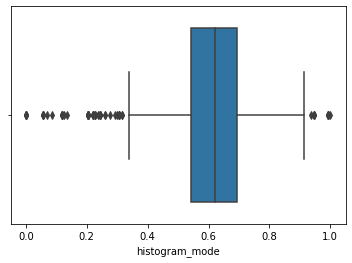

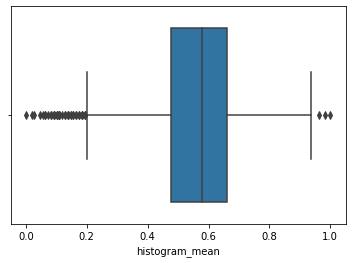

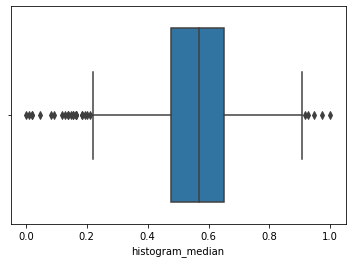

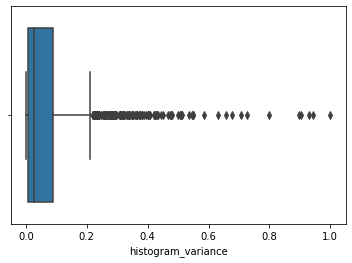

In [ ]:
for x in df.loc[:,'baseline value':'histogram_variance']:
  plt.figure()
  sns.boxplot(x=df[x])

In [ ]:
def IQR(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  return(IQR)

In [ ]:
columns_transform = df[['accelerations','fetal_movement','light_decelerations','severe_decelerations', 'prolongued_decelerations', 'mean_value_of_short_term_variability'
,'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_variance']]
IQR = IQR(columns_transform)
Q1 = columns_transform.quantile(0.25)
Q3 = columns_transform.quantile(0.75)

In [ ]:
df['accelerations'] = df['accelerations'][~((df['accelerations'] < (Q1[0] - 1.5 * IQR[0])) |(df['accelerations'] > (Q3[0] + 1.5 * IQR[0])))]

df['fetal_movement'] = df['fetal_movement'][~((df['fetal_movement'] < (Q1[1] - 1.5 * IQR[1])) |(df['fetal_movement'] > (Q3[1] + 1.5 * IQR[1])))]

df['light_decelerations'] = df['light_decelerations'][~((df['light_decelerations'] < (Q1[2] - 1.5 * IQR[2])) |(df['light_decelerations'] > (Q3[2] + 1.5 * IQR[2])))]

df['severe_decelerations'] = df['severe_decelerations'][~((df['severe_decelerations'] < (Q1[3] - 1.5 * IQR[3])) |(df['severe_decelerations'] > (Q3[3] + 1.5 * IQR[3])))]

df['prolongued_decelerations'] = df['prolongued_decelerations'][~((df['prolongued_decelerations'] < (Q1[4] - 1.5 * IQR[4])) |(df['prolongued_decelerations'] > (Q3[4] + 1.5 * IQR[4])))]

df['mean_value_of_short_term_variability'] = df['mean_value_of_short_term_variability'][~((df['mean_value_of_short_term_variability'] < (Q1[5] - 1.5 * IQR[5])) |(df['mean_value_of_short_term_variability'] > (Q3[5] + 1.5 * IQR[5])))]

df['percentage_of_time_with_abnormal_long_term_variability'] = df['percentage_of_time_with_abnormal_long_term_variability'][~((df['percentage_of_time_with_abnormal_long_term_variability'
] < (Q1[6] - 1.5 * IQR[6])) |(df['percentage_of_time_with_abnormal_long_term_variability'] > (Q3[6] + 1.5 * IQR[6])))]

df['mean_value_of_long_term_variability'] = df['mean_value_of_long_term_variability'][~((df['mean_value_of_long_term_variability']
                                                                                         < (Q1[7] - 1.5 * IQR[7])) |(df['mean_value_of_long_term_variability'] > (Q3[7] + 1.5 * IQR[7])))]

df['histogram_variance'] = df['histogram_variance'][~((df['histogram_variance'] < (Q1[8] - 1.5 * IQR[8])) |(df['histogram_variance'] > (Q3[8] + 1.5 * IQR[8])))]

In [24]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
percentage_of_time_with_abnormal_long_term_variability,309,0.145343
fetal_movement,307,0.144403
histogram_variance,184,0.086548
prolongued_decelerations,178,0.083725
light_decelerations,150,0.070555
mean_value_of_long_term_variability,71,0.033396
mean_value_of_short_term_variability,70,0.032926
accelerations,14,0.006585
severe_decelerations,7,0.003293
uterine_contractions,0,0.000000


In [25]:
df[['percentage_of_time_with_abnormal_long_term_variability','fetal_movement','histogram_variance','prolongued_decelerations','light_decelerations','mean_value_of_long_term_variability',
    'mean_value_of_short_term_variability','accelerations','severe_decelerations']] = df[['percentage_of_time_with_abnormal_long_term_variability','fetal_movement','histogram_variance','prolongued_decelerations','light_decelerations','mean_value_of_long_term_variability',
    'mean_value_of_short_term_variability','accelerations','severe_decelerations']].fillna(df[['percentage_of_time_with_abnormal_long_term_variability','fetal_movement','histogram_variance','prolongued_decelerations','light_decelerations','mean_value_of_long_term_variability',
    'mean_value_of_short_term_variability','accelerations','severe_decelerations']].mean())

In [26]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
fetal_health,0,0.0
percentage_of_time_with_abnormal_long_term_variability,0,0.0
accelerations,0,0.0
fetal_movement,0,0.0
uterine_contractions,0,0.0
light_decelerations,0,0.0
severe_decelerations,0,0.0
prolongued_decelerations,0,0.0
abnormal_short_term_variability,0,0.0
mean_value_of_short_term_variability,0,0.0


Log Transformations

In [27]:
df[['accelerations','uterine_contractions','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','histogram_min'
,'histogram_variance']] = np.log(df[['accelerations','uterine_contractions','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','histogram_min'
,'histogram_variance']]+0.01)

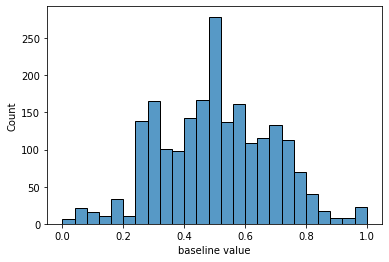

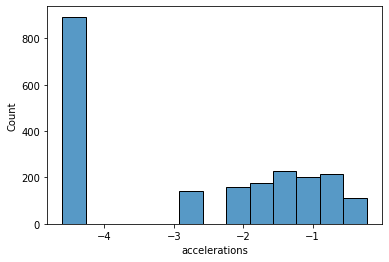

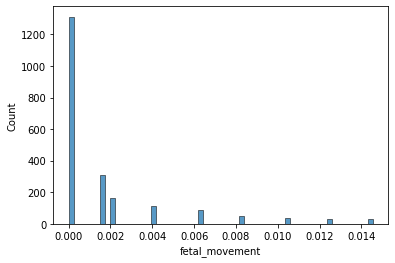

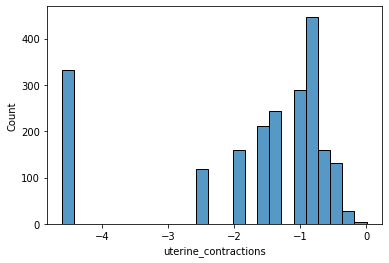

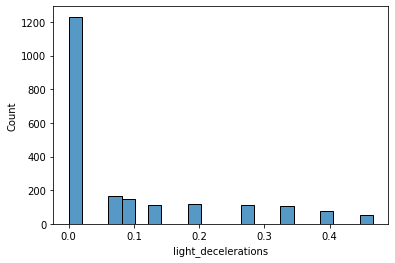

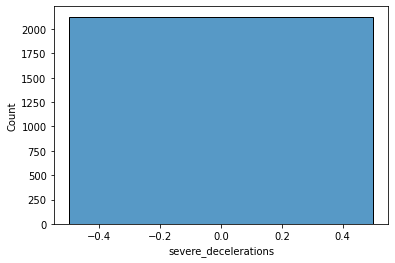

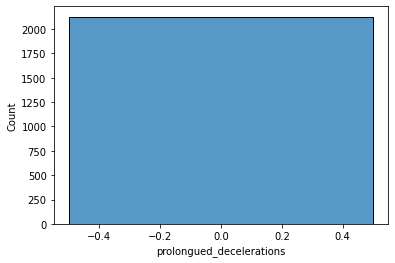

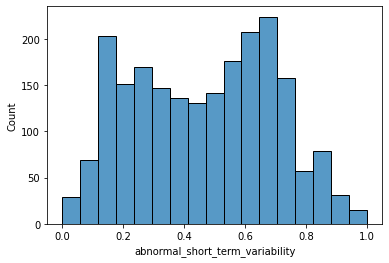

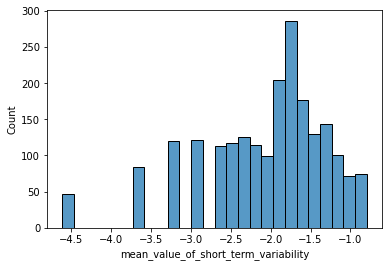

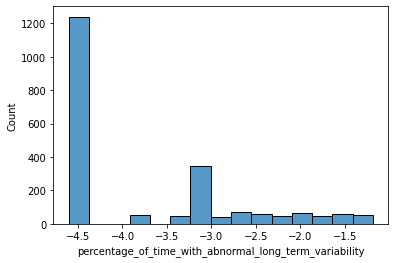

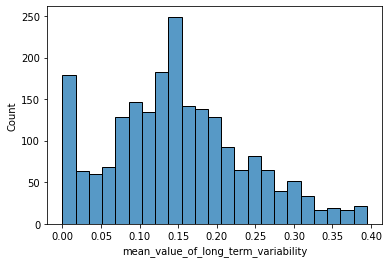

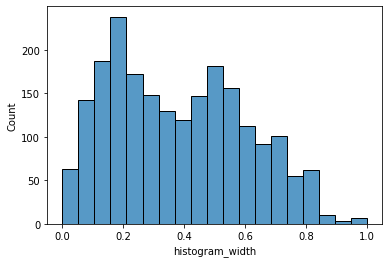

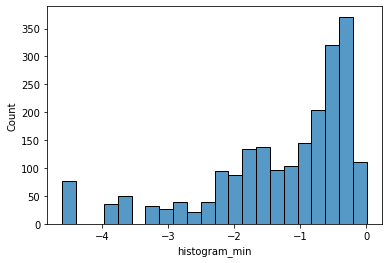

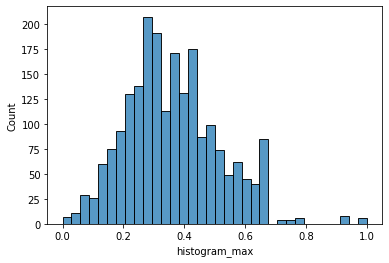

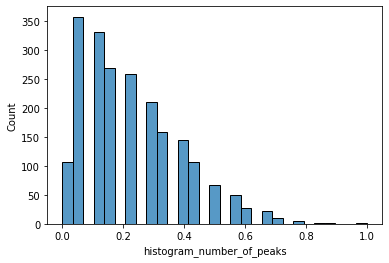

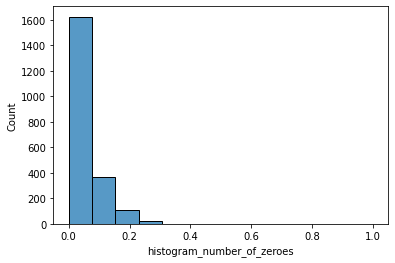

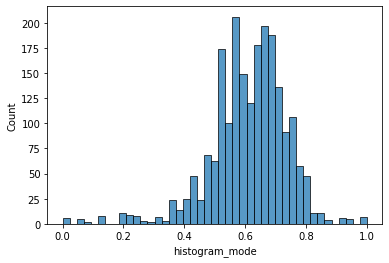

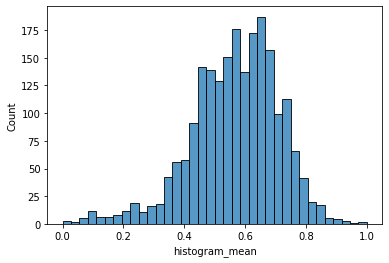

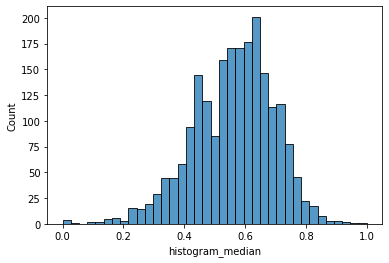

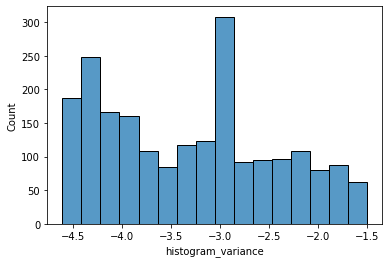

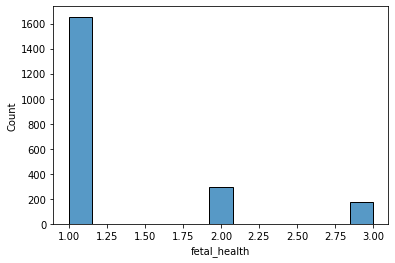

In [28]:
for i in df.columns:
  plt.figure()
  sns.histplot(data=df,x=i)

Split into training and testing sets for KNN

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.iloc[:, :-1].values
y = df['fetal_health']

In [34]:
X.shape, y.shape

((2126, 20), (2126,))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
y_pred = classifier.predict(X_test)

Test validity of KNN model

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[521  25   9]
 [ 34  59   5]
 [ 10   7  32]]
              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       555
         2.0       0.65      0.60      0.62        98
         3.0       0.70      0.65      0.67        49

    accuracy                           0.87       702
   macro avg       0.76      0.73      0.74       702
weighted avg       0.87      0.87      0.87       702



In [40]:
df_test = pd.DataFrame()
df_test['Predicted'] = y_pred
y_test = np.array(y_test)
df_test['Actual_Number'] = y_test
df_test

,Predicted,Actual_Number
0,1.0,1.0
1,1.0,1.0
2,1.0,2.0
3,3.0,1.0
4,1.0,1.0
...,...,...
697,1.0,1.0
698,1.0,1.0
699,1.0,1.0
700,1.0,1.0


In [41]:
import seaborn as sn
from sklearn import metrics

Accuracy:  0.8717948717948718


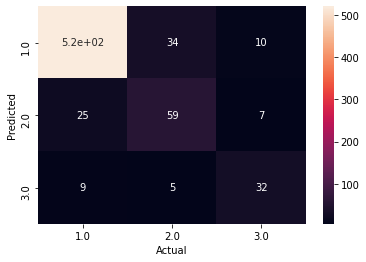

In [43]:
confusion_matrix = pd.crosstab(df_test.Predicted,df_test.Actual_Number, rownames=['Predicted'], colnames=['Actual'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(df_test.Predicted,df_test.Actual_Number))
plt.show()

In [44]:
filename = 'Fetal_Health_Classifier.csv'
df_test.to_csv(filename,index=False)